In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


os.chdir('/home/sarvagya/DeepLenseSubmissionProposal-2025')

axion_path = 'data/Dataset/axion/axion_sim_339321430908353297068939651799477896926.npy'
cdm_path = 'data/Dataset/cdm/cdm_sim_20369110413407829654262885881264060.npy'
no_path = 'data/Dataset/no_sub/no_sub_sim_6956151560647865808482838248806684.npy'

# Load with allow_pickle=True
axion = np.load(axion_path, allow_pickle=True)
cdm = np.load(cdm_path, allow_pickle=True)
no = np.load(no_path, allow_pickle=True)

print(f"axion: {axion.shape}, cdm: {cdm.shape}, no: {no.shape}")


axion: (2,), cdm: (64, 64), no: (64, 64)


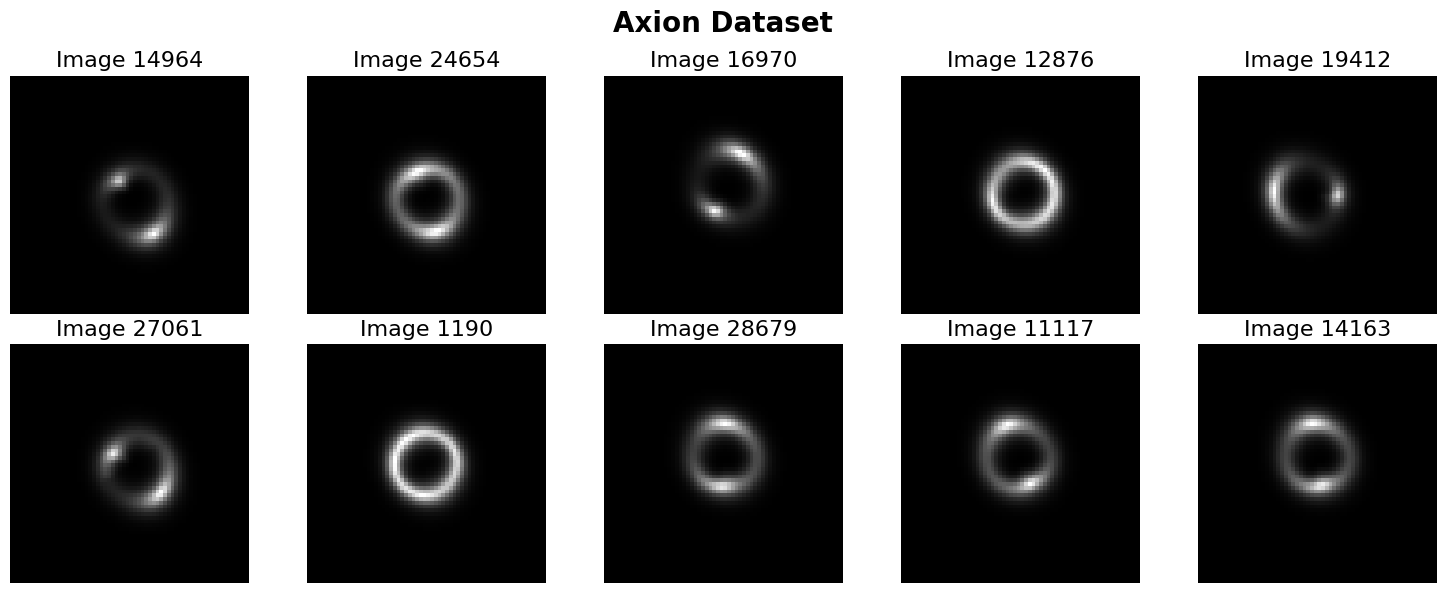

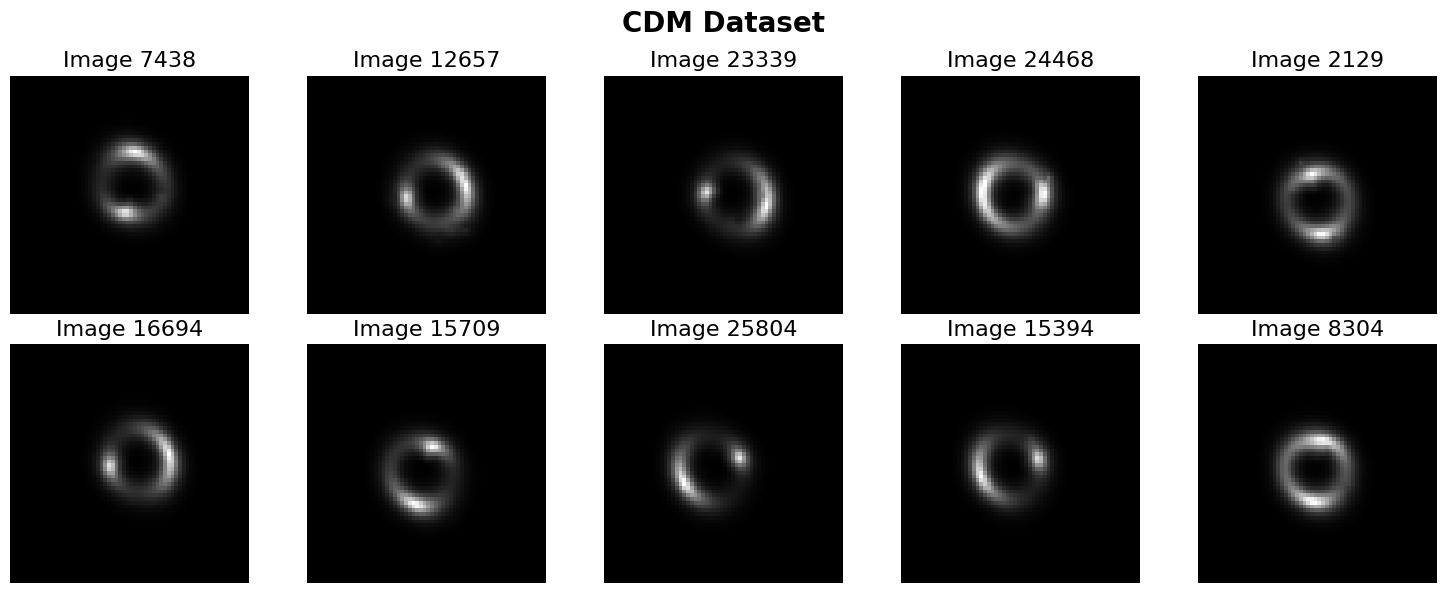

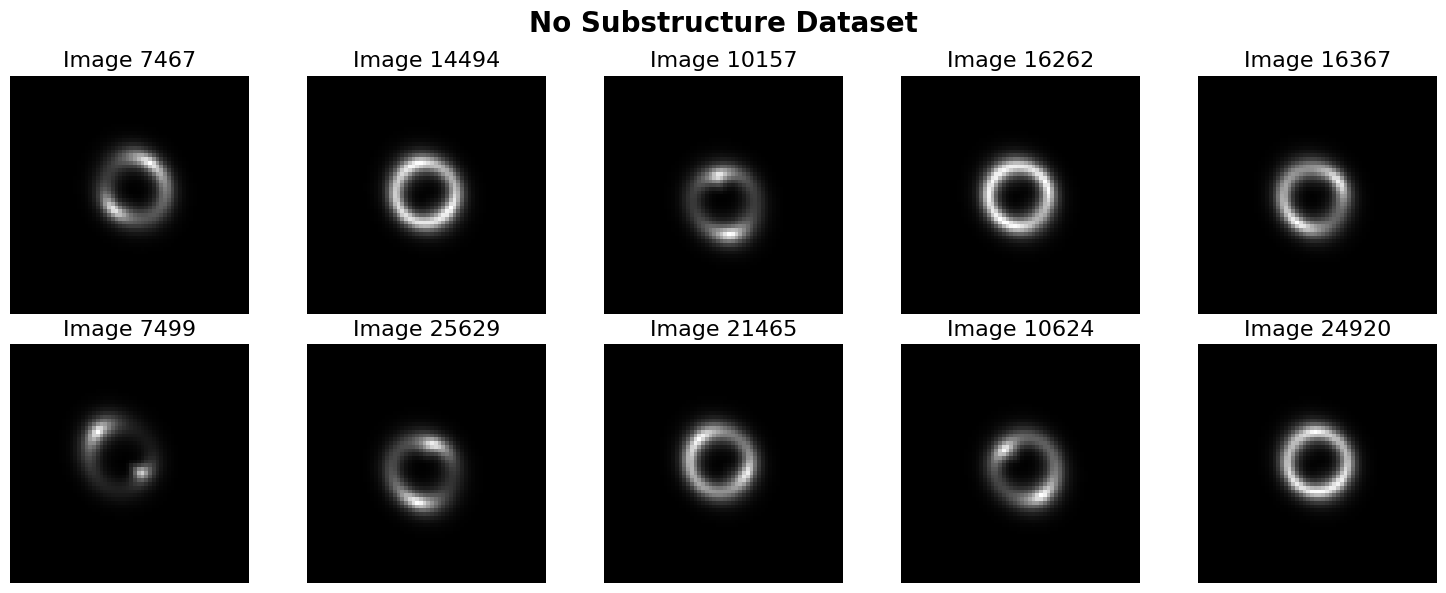

In [12]:
# plot the random 10 images (with seed) of each dataset

axion_dir = 'data/Dataset/axion'
cdm_dir = 'data/Dataset/cdm'
no_dir = 'data/Dataset/no_sub'

def plot_random_images(data_dir, title, num_images=10):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    np.random.seed(42)  # Set seed for reproducibility
    files = glob.glob(os.path.join(data_dir, '*.npy'))
    indices = np.random.choice(len(files), num_images, replace=False)
    for i, idx in enumerate(indices):
        img = np.load(files[idx], allow_pickle=True)
        if 'axion' in data_dir:
            img = img[0]
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Image {idx}' , fontsize=16)
    plt.suptitle(title, fontsize=20, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plot random images from each dataset
plot_random_images(axion_dir, "Axion Dataset")
plot_random_images(cdm_dir, "CDM Dataset")
plot_random_images(no_dir, "No Substructure Dataset")


In [17]:
t = axion[0]

np.min(t), np.max(t)

(np.float64(1.951192159202817e-12), np.float64(3.837134549785011))

In [14]:
axion[1]

np.float64(5.0009526335747644e-24)

0.0 1.0
0.0015272285780098278 0.9695454065571253
0.0 1.0
0.002998999920785805 0.9774883159062104
0.0 1.0
0.0012120045279097385 0.941863216300475
0.0 1.0
0.0046305546675191826 0.9954718470268544
0.0 1.0
0.003166550220189702 0.9498658219004064


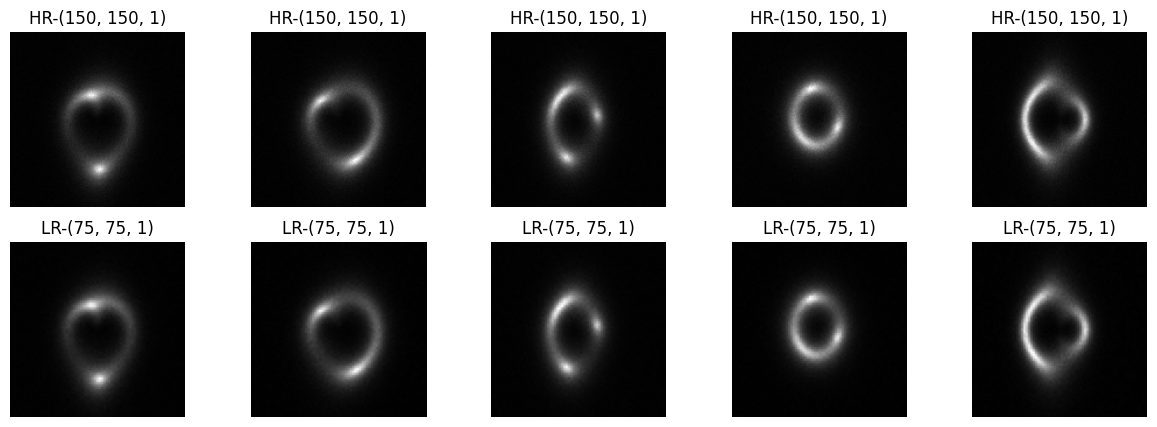

In [4]:
import glob
import random 
import os

BASE_PATH = 'data/SR/Dataset/'

HR_DIR = os.path.join(BASE_PATH, 'HR')
LR_DIR = os.path.join(BASE_PATH, 'LR')

image_paths = glob.glob(os.path.join(HR_DIR, '*.npy'))
N = 5
HR_image_paths = random.sample(image_paths, N)
LR_image_paths = [path.replace('HR', 'LR') for path in HR_image_paths]

# plot the images 
fig, ax = plt.subplots(2, N, figsize=(15, 5))
for i, (HR_path, LR_path) in enumerate(zip(HR_image_paths, LR_image_paths)):
    HR_image = np.load(HR_path).T
    LR_image = np.load(LR_path).T
    ax[0, i].imshow(HR_image, cmap='gray')
    ax[0,i].set_title(f'HR-{HR_image.shape}')
    ax[1, i].imshow(LR_image, cmap='gray')
    ax[1,i].set_title(f'LR-{LR_image.shape}')
    print(min(HR_image.flatten()), max(HR_image.flatten()))
    print(min(LR_image.flatten()), max(LR_image.flatten()))
    ax[0, i].axis('off')
    ax[1, i].axis('off')
plt.show()